**HAND WRITTEN DIGIT PREDICTION - CLASSIFICATION** **ANALYSIS** **bold text**

**Objective**

The digits datasheet consisits of 8*8 pixel images of digits . The images attribute of the dataset stores 8*8 arrays of grayscale values for each image. We will use arrays to visualize the first images . The targetr attribute of the datasheet stores the digit each image represents

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

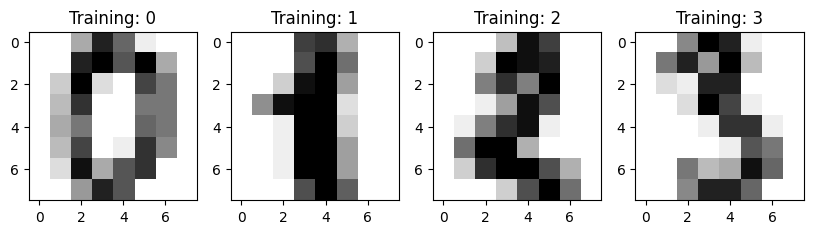

In [3]:
from sklearn.datasets import load_digits
df = load_digits()
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes,df.images, df.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


Data Preprocessing

Flatten Image

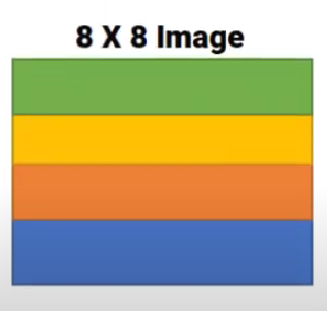

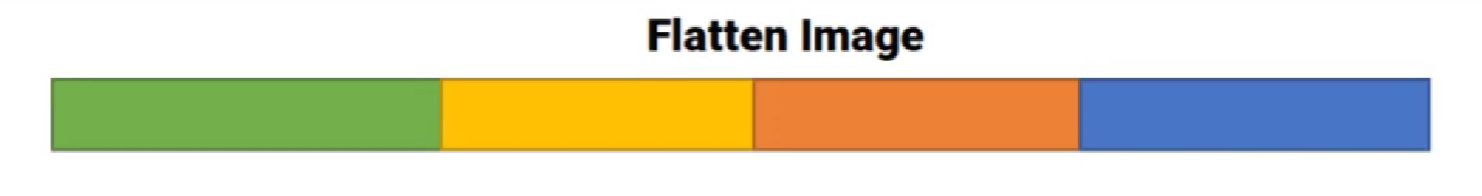

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [8]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

Scaling Image Data

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data = data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, df.target,test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Test Data

In [24]:
y_pred = rf.predict(X_test)
y_pred

array([8, 9, 6, 0, 3, 0, 8, 5, 7, 0, 4, 2, 2, 7, 1, 0, 9, 2, 3, 0, 5, 9,
       0, 7, 0, 3, 8, 5, 6, 9, 4, 2, 1, 8, 8, 2, 8, 9, 5, 3, 0, 7, 9, 1,
       1, 4, 0, 3, 4, 0, 2, 8, 8, 8, 5, 6, 6, 3, 0, 6, 6, 7, 1, 4, 3, 5,
       1, 7, 8, 6, 1, 3, 1, 7, 7, 6, 1, 5, 6, 2, 6, 5, 6, 6, 3, 0, 1, 3,
       3, 4, 5, 5, 3, 4, 5, 7, 2, 6, 1, 0, 3, 8, 0, 9, 2, 0, 7, 9, 8, 5,
       6, 2, 7, 3, 1, 8, 7, 5, 1, 4, 1, 4, 1, 2, 3, 7, 2, 9, 2, 1, 8, 5,
       5, 0, 6, 6, 1, 8, 9, 7, 0, 7, 9, 2, 8, 1, 5, 6, 1, 7, 3, 6, 4, 5,
       2, 8, 1, 7, 5, 1, 7, 7, 4, 8, 9, 4, 4, 4, 8, 9, 3, 5, 9, 8, 1, 8,
       8, 2, 2, 5, 5, 7, 2, 7, 8, 1, 9, 3, 5, 5, 3, 5, 8, 0, 2, 5, 2, 5,
       4, 9, 9, 5, 3, 2, 0, 9, 0, 9, 5, 0, 9, 7, 7, 7, 6, 1, 1, 1, 7, 8,
       5, 9, 4, 9, 4, 6, 7, 0, 4, 0, 2, 4, 5, 1, 2, 9, 1, 6, 9, 9, 8, 4,
       9, 6, 8, 0, 7, 6, 2, 3, 7, 6, 7, 9, 1, 6, 0, 5, 0, 1, 8, 7, 1, 8,
       1, 3, 0, 6, 5, 4, 4, 4, 3, 8, 9, 0, 5, 3, 3, 0, 9, 1, 7, 1, 0, 3,
       9, 2, 2, 6, 1, 2, 4, 2, 4, 2, 6, 7, 1, 5, 2,

Model Acuracy

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 53,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  1, 53,  2],
       [ 0,  1,  0,  1,  0,  1,  0,  1,  1, 51]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.93      1.00      0.97        56
           2       0.98      1.00      0.99        54
           3       0.98      0.93      0.95        57
           4       0.98      0.94      0.96        47
           5       0.97      0.97      0.97        62
           6       0.98      1.00      0.99        50
           7       0.91      1.00      0.95        49
           8       0.95      0.88      0.91        60
           9       0.94      0.91      0.93        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

